In [3]:
'''
Today, analyzed dateset will be something special - from far, far away galaxy.
Dataset was created from an online survey before SW: The Force Awakens.
The results of the survey are stored in the csv file an can be found under:
https://github.com/fivethirtyeight/data/tree/master/star-wars-survey

The data has several columns, including:
RespondentID -- An anonymized ID of the person taking the survey.
Gender -- Gender of the respondent.
Age -- Age of the respondent.
And many, many more, full list of columns can be readed from header of file, but one thing
to mention is that dataset contain many columns that need cleaning before processing - like
column with chceckbox answer about SW seen by responent.
There is a lot of work to do - so let's get into it.

'''

"\nToday, analyzed dateset will be something special - from far, far away galaxy.\nDataset was created from an online survey before SW: The Force Awakens.\nThe results of the survey are stored in the csv file an can be found under:\nhttps://github.com/fivethirtyeight/data/tree/master/star-wars-survey\n\nThe data has several columns, including:\nRespondentID -- An anonymized ID of the person taking the survey.\nGender -- Gender of the respondent.\nAge -- Age of the respondent.\nAnd many, many more, full list of columns can be readed from header of file, but one thing\nto mention is that dataset contain many columns that need cleaning before processing - like\ncolumn with chceckbox answer about SW seen by responent.\nThere is a lot of work to do - so let's get into it.\n\n"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# reading the data + preview
data = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
data.head(20)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [6]:
# We can see thst heres is some mising data, including respondent ID column which is our primary
# key - that IDs need to be dealt with. (It might be a good idea to maybe transform some of
# columns like the ones about SW movies seen to categorical values for example 'Seen EP 1' - True/False)
# But let's take care of IDs first.
# Note: First row we can see is actually some data describing columns content as well so it will be 
# stored seperatly

In [7]:
additional_info_row = data.iloc[0, :]
data.dropna(axis=0, subset=['RespondentID'], inplace=True)

In [8]:
# Let's make sure that all worked well and see amount of nan values in other columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                       

In [9]:
# Now I will transform columns that indicates if responednt has seen corresponding SW movie into
# a more readable form (and boolean type)
# Before that, first questions (Have you seen any of the 6 films in the Star Wars franchise?,                                                                                                                             Yes
# Do you consider yourself to be a fan of the Star Wars film franchise?) will be transformed to 
# boolean as well as they are containing Yes/No answers


In [10]:
# a little thing to reduce column names writing
col_name_seen_any = 'Have you seen any of the 6 films in the Star Wars franchise?'
col_name_consider_fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

In [11]:
mapping_dict = {'Yes': True, 'No': False}
data[col_name_seen_any] = data[ col_name_seen_any].map(mapping_dict)
data[col_name_consider_fan] = data[
    col_name_consider_fan].map(mapping_dict)

In [12]:
# Earlier we saw that the second converted column had some Nan values, let's take a closer look at it
print(data[col_name_consider_fan].value_counts())
# well, seems like value counts does not include nans so let's count them another way
nan_count = data[col_name_consider_fan].isnull().sum()
print('Nulls in column:', nan_count)

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
Nulls in column: 350


In [13]:
# Well in our case we can't do much about it - but there is one safe assumption: if respondent
# haven't seen any SW movie he does not consider himself a fan of it definitely
# Let's reduce some of missing values using that fact
data.loc[(data[col_name_consider_fan].isnull()) & (data[col_name_seen_any] == False)
    , col_name_consider_fan] = False


In [14]:
# Let's look in our column again:
print(data[col_name_consider_fan].value_counts())
nan_count = data[col_name_consider_fan].isnull().sum()
print('Nulls in column:', nan_count)

True     552
False    534
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
Nulls in column: 100


In [15]:
# Our little operation resulted in replacing 250 nan values - which is nice
# Now moving on to transforming columns with movies seen

In [16]:
# Additional row preserved earlier will be helpful
movies_names = additional_info_row.values[3:9]
# data.columns[3:9] = movies_names
for i in range(6):
    new_col_name = 'Ep ' + str(i+1) + ' seen'
    data.rename(columns={data.columns[3+i]: new_col_name}, inplace=True)
    mapping_dict = {movies_names[i]: True, np.nan: False}
    data.loc[:, new_col_name] = data.loc[:, new_col_name].map(mapping_dict)
    
print(data.head())

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                              False                      
3                                              False                      
4                                               True                      
5                                               True                      

  Ep 1 seen Ep 2 seen Ep 3 seen Ep 4 seen Ep 5 seen Ep 6 seen  \
1  

In [17]:
# All went well
# print(data.ix[:, 8:20])
# after looking up some next columns, the next 6 ones are containing respondent personal ranking
# of SW movies - but again we have to rename columns as they are named like 'unnamed 10' etc.
# Other thing to do is converting the data type of that columns - as they contain numbres in range
# <1;6> we can make them numerical to make operations like comparisions easier
data.loc[:, data.columns[9:15]] = data[data.columns[9:15]].astype(float)
for i in range(6):
    new_col_name = 'Rank of ' + str(i+1) + ' Ep'
    data.rename(columns={data.columns[9+i]: new_col_name}, inplace=True)
# Checking results
print(data.ix[:, 9:15])

      Rank of 1 Ep  Rank of 2 Ep  Rank of 3 Ep  Rank of 4 Ep  Rank of 5 Ep  \
1              3.0           2.0           1.0           4.0           5.0   
2              NaN           NaN           NaN           NaN           NaN   
3              1.0           2.0           3.0           4.0           5.0   
4              5.0           6.0           1.0           2.0           4.0   
5              5.0           4.0           6.0           2.0           1.0   
6              1.0           4.0           3.0           6.0           5.0   
7              6.0           5.0           4.0           3.0           1.0   
8              4.0           5.0           6.0           3.0           2.0   
9              5.0           4.0           6.0           2.0           1.0   
10             1.0           2.0           3.0           4.0           5.0   
11             NaN           NaN           NaN           NaN           NaN   
12             NaN           NaN           NaN           NaN    

In [18]:
# Now that we have all that data about ranking itwouldbe a sin to not check which movie has the
# best position
ranking_means = data[data.columns[9:15]].mean()
# But let's wait with the checking results until preparation for visualization is made

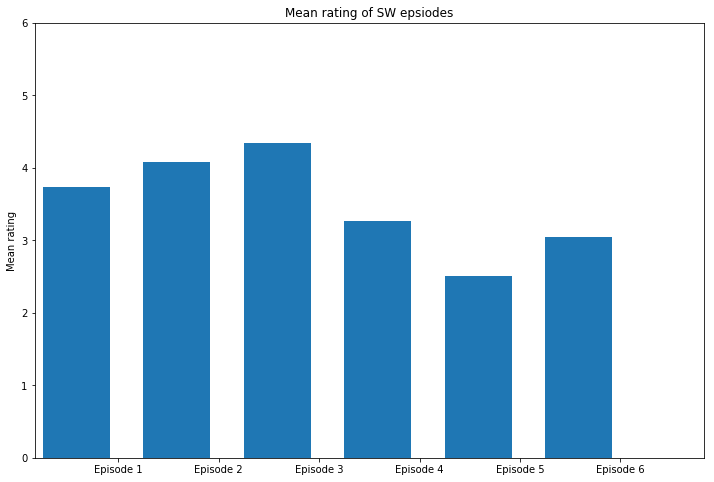

In [19]:
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.bar(np.arange(6) * 1.2 + 0.5, ranking_means)
plt.ylim(0, 6)
plt.xlim(0, 8)
plt.xticks(np.arange(6) * 1.2 + 1.0, ['Episode ' + str(i) for i in range(1, 7)])
plt.ylabel('Mean rating')
plt.title('Mean rating of SW epsiodes')
plt.show()

In [20]:
# And the winner is... Empire strikes back!
# But we can see that overally old trilogy is ranked better than the new one.
# The order of mean ranking in old trilogy is not surprising (I actually expected this one),
# but for the new one I'am quite surprised - Phantom Menace is first, where the movie plot was
# just starting the prequels development, additionaly I think that there hasn't been any period 
# longer than two weeks (since it came out) between me hearing someone cursing Jar-Jar :)

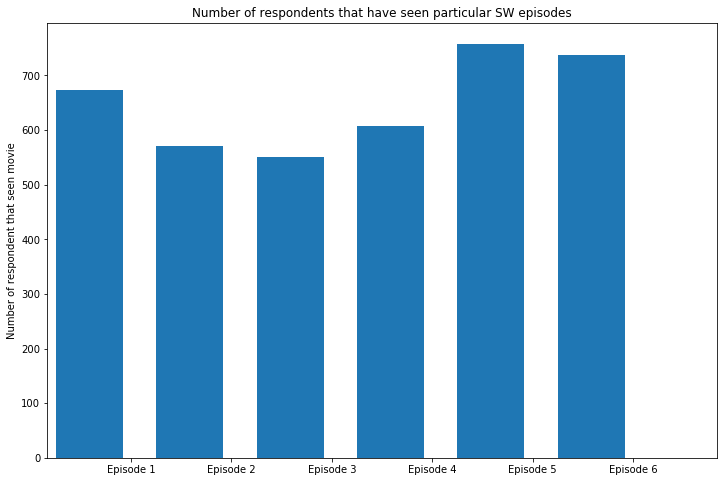

In [21]:
# Now I'm intersted to see how many of respondents has seen each movie - have more people seen 
# older movies (that are available longer), or the maybe newer ones, and which in particular
seen_sums = data[data.columns[3:9]].sum()
plt.figure(figsize=(12, 8))
plt.bar(np.arange(6) * 1.2 + 0.5, seen_sums)
plt.xticks(np.arange(6) * 1.2 + 1.0, ['Episode ' + str(i+1) for i in range(6)])
plt.xlim(0, 8)
plt.ylabel('Number of respondent that seen movie')
plt.title('Number of respondents that have seen particular SW episodes')
plt.show()

In [22]:
# The results are rather balanced - the thing that cathces eye is that Ep. 4 has quite significantly
# lower value than other movies of old  trilogy
# Excluding mentioned one all other episodes results correspond to mean ranking score -the better
# mean ranking the more people has seen the movie

In [23]:
# We saw results in all respondents group - but how (if any) they will differ if we split respondents
# by catgory - like grouping they by gender (to male and female)

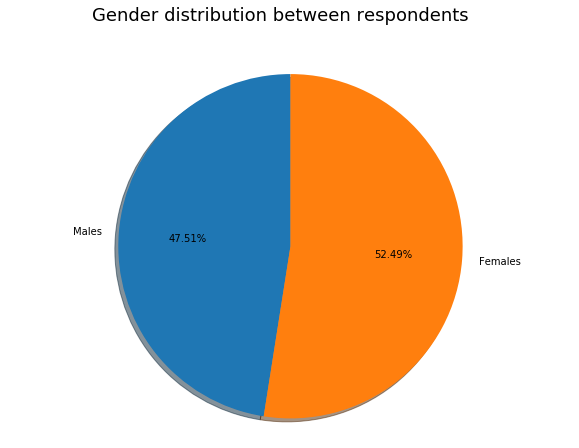

In [24]:
males = data[data['Gender'] == 'Male']
females = data[data['Gender'] == 'Female']
labels = ['Males', 'Females']
sizes = [len(males) / len(data) * 100, len(females) / len(data) * 100]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax.axis('equal')

fig.suptitle('Gender distribution between respondents', fontsize=18)
fig.set_size_inches((10, 7))
plt.show()

In [25]:
# I used splitting to group as an occasion to get the idea about gender proportions in our group - 
# a little surprise, as we can see, females have slight advantage here
# I can't let it go now, let's see how these proportions look like in respondents that identify
# themselves as a SW fans

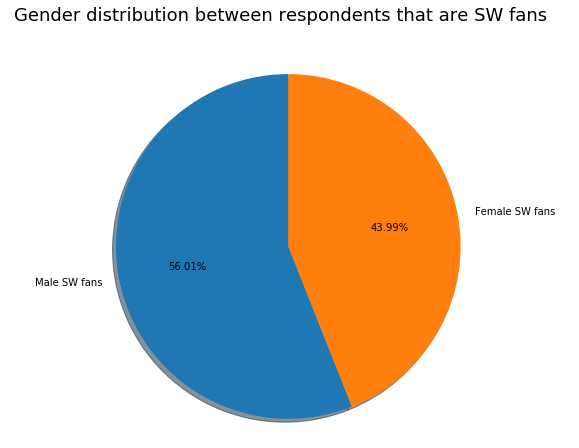

In [26]:
sw_fans = data[data['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
male_sw_fans = sw_fans[sw_fans['Gender'] == 'Male']
female_sw_fans = sw_fans[sw_fans['Gender'] == 'Female']
labels = ['Male SW fans' , 'Female SW fans']
sizes = [len(male_sw_fans) / len(sw_fans) * 100, len(female_sw_fans) / len(sw_fans) * 100]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax.axis('equal')

fig.suptitle('Gender distribution between respondents that are SW fans', fontsize=18)
fig.set_size_inches((10, 7))
plt.show()

In [27]:
# Well, males have majority here (as expected) but that difference is not as big as one could expect
# Now, let's go back to our previous task - calculating mean rating and movie-seen counts in 
# particular gender groups

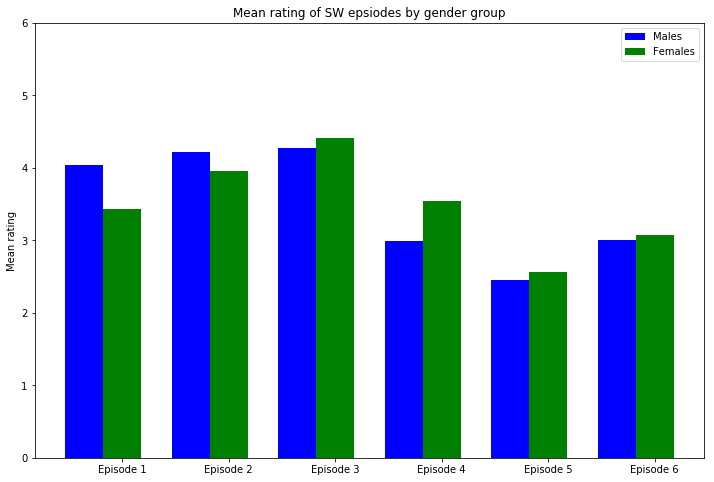

In [28]:
ranking_male_means = males[males.columns[9:15]].mean()
ranking_female_means = females[females.columns[9:15]].mean()
plt.figure(figsize=(12, 8))
b1 = plt.bar(np.arange(6) * 1.4 + 0.5, ranking_male_means, color='b', width=0.5)
b2 = plt.bar(np.arange(6) * 1.4 + 1.0, ranking_female_means, color='g', width=0.5)
plt.ylim(0, 6)
plt.xticks(np.arange(6) * 1.4 + 1.0, ['Episode ' + str(i) for i in range(1, 7)])
plt.legend([b1, b2], ['Males', 'Females'])
plt.ylabel('Mean rating')
plt.title('Mean rating of SW epsiodes by gender group')
plt.show()

In [29]:
# Results do not differ very much, from our data males tends to rate Ep 1 a bit better, while
# females rate Ep 4 higher than males
# How about movie-seen counts?

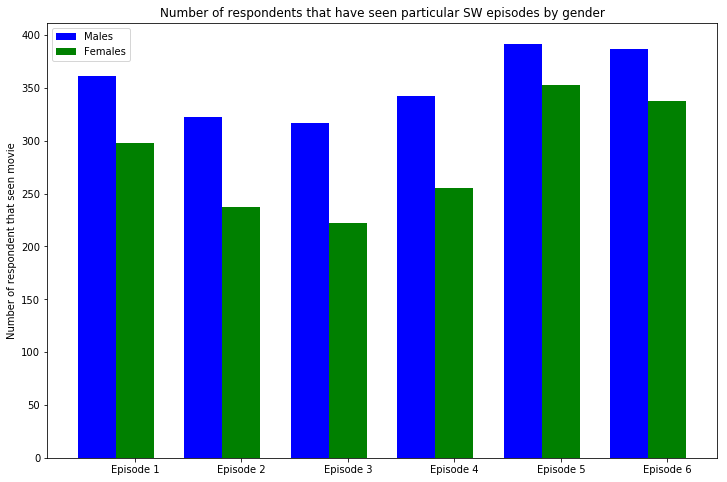

In [30]:
males_seen_sums = males[males.columns[3:9]].sum()
females_seen_sums = females[females.columns[3:9]].sum()
plt.figure(figsize=(12, 8))
b1 = plt.bar(np.arange(6) * 1.4 + 0.5, males_seen_sums, width=0.5, color='b')
b2 = plt.bar(np.arange(6) * 1.4 + 1.0, females_seen_sums, width=0.5, color='g')
plt.xticks(np.arange(6) * 1.4 + 1.0, ['Episode ' + str(i+1) for i in range(6)])
plt.ylabel('Number of respondent that seen movie')
plt.title('Number of respondents that have seen particular SW episodes by gender')
plt.legend([b1, b2], ['Males', 'Females'])
plt.show()

In [31]:
# Count of movies seens are lower in female case but they seems to be rather proportional in 
# case of single episodes (lowest amount of females has seen Ep 3 as weel as males, the greatest 
# amount of male watchers has Ep 5, same for female watchers etc. )
# Let's investigate a bit what are favourite characters of respondents, first we will need 
# to rename column apropriately using our saved first row

In [32]:
# Preview for analysis
print(data.ix[:, 15:30])

     Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.  \
1                                        Very favorably                                                               
2                                                   NaN                                                               
3                                    Somewhat favorably                                                               
4                                        Very favorably                                                               
5                                        Very favorably                                                               
6                                        Very favorably                                                               
7                                        Very favorably                                                               
8                                        Very fa

In [33]:
print(additional_info_row.values[15:30])

['Han Solo' 'Luke Skywalker' 'Princess Leia Organa' 'Anakin Skywalker'
 'Obi Wan Kenobi' 'Emperor Palpatine' 'Darth Vader' 'Lando Calrissian'
 'Boba Fett' 'C-3P0' 'R2 D2' 'Jar Jar Binks' 'Padme Amidala' 'Yoda'
 'Response']


In [34]:
prefix = 'How do you find '
character_names = additional_info_row.values[15:29]
for i in range(14):
    new_col_name = prefix + character_names[i]
    data.rename(columns={data.columns[15+i]: new_col_name}, inplace=True)
    

In [35]:
# It seems that for the 'sympathy' towards character values were provided in survey 
# (They were not inputed manually), that would make things much easier
# let's confirm that
print(data['How do you find Yoda'].value_counts())

Very favorably                                 605
Somewhat favorably                             144
Neither favorably nor unfavorably (neutral)     51
Unfamiliar (N/A)                                10
Somewhat unfavorably                             8
Very unfavorably                                 8
Name: How do you find Yoda, dtype: int64


In [36]:
# Yes, it is as I saw it in preview - actually we have around ~850 values here (out of ~1200 rows),
# frankly I expected some lower amount (by the way, it is another proof that survey did not
# require manual inputing - then we will definitely have less values )
# Let's create the most liked/hated character rankings

In [37]:
# Rules for liked/hated points in rankings (they will be two, one for most liked, second for most hated)
# If value is Very favorably: +2 points in liked
# If value is Somewhat favorably: +1 point in liked
# If value is Somewhat unfavorably: +1 point in hated
# If value is Very unfavorably +2 points in hated
# Pretty simple

In [38]:
liked_points = {}
for i in range(14):
    col_name = data.columns[15+i]
    character_name = col_name[len(prefix):]
    counts = data[col_name].value_counts()
    points = 2 * counts['Very favorably'] + counts['Somewhat favorably']
    liked_points[character_name] = points

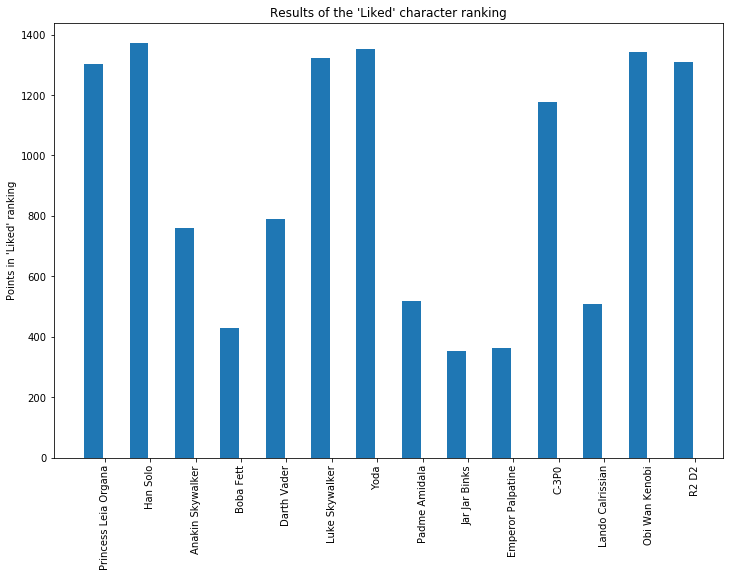

In [39]:
# And let's visualize results
labels, values = liked_points.keys(), liked_points.values()
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(values)) * 1.2 + 0.5, values, width=0.5)
plt.xticks(np.arange(len(values)) * 1.2 + 0.8, labels, rotation='vertical')
plt.ylabel('Points in \'Liked\' ranking')
plt.title('Results of the \'Liked\' character ranking')
plt.show()

In [40]:
# Results:
# We have some characters really close in points - with Han Solo at first place (minimal advantage)
# The character with lovest amount of points is Jar Jar - beating 'Evil' Emperor Palpatine
# There is one case when character figures in two columns - Anakin Skywalker that has really similar
# result both named as 'Anakin Skywaler' and 'Darth Vader'
# And how about the 'Hated' ranking?

In [41]:
hated_points = {}
for i in range(14):
    col_name = data.columns[15+i]
    character_name = col_name[len(prefix):]
    counts = data[col_name].value_counts()
    points = 2 * counts['Very unfavorably'] + counts['Somewhat unfavorably']
    hated_points[character_name] = points

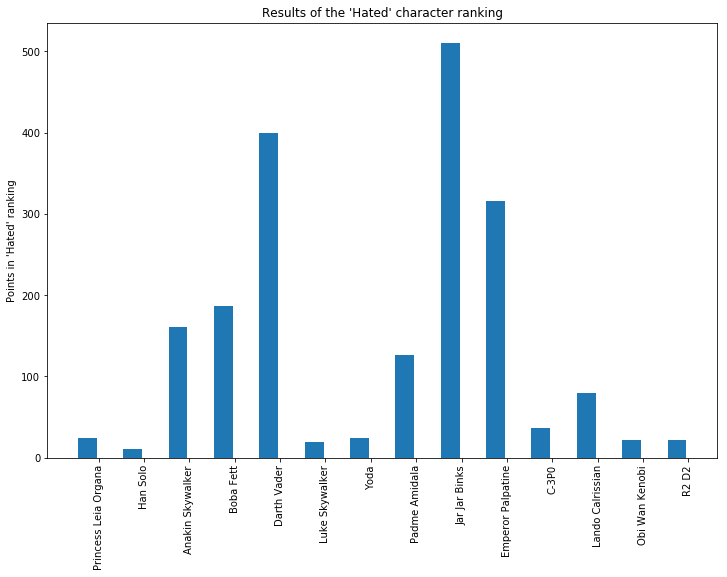

In [42]:
labels, values = hated_points.keys(), hated_points.values()
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(values)) * 1.2 + 0.5, values, width=0.5)
plt.xticks(np.arange(len(values)) * 1.2 + 0.8, labels, rotation='vertical')
plt.ylabel('Points in \'Hated\' ranking')
plt.title('Results of the \'Hated\' character ranking')
plt.show()

In [43]:
# Resluts:
# The glorious winner is Jar-Jar, who destroys his opponents
# Characters that scored highly in previous ranking have minimal amount of points in this one
# This time difference between is 'Anakin Skywalker' and 'Darth Vader' is great, in fact Vader
# has the second value (not Palpatine that very really close to score worse thanJar-Jar in first ranking)

In [44]:
# The last thing I want to investigate, 'cherry on top' is a gag question i noticed earlier -
# column named 'Which character shot first?'. If you google it was also a controversy - in the original
# version it was Han, in later it was Greedo and finally in special edition it was Han again 
# (G.Lucas even stated that explictly). Earlier people were fighting a bit over it and kept coming up with new
# and new proofs of their version. I will check how many respondents understood that question
# (well, at least according to resuts, in reality one could pick the name he knew despite
# the fact of not understanding)

In [45]:
counts = data['Which character shot first?'].value_counts()
han_greedo_count = counts['Han'] + counts['Greedo']
understood_factor_in_all = han_greedo_count / len(data)

# and how many that factors look like in group that consider themselves SW fans?
counts = sw_fans['Which character shot first?'].value_counts()
han_greedo_count = counts['Han'] + counts['Greedo']
understood_factor_in_sw_fans = han_greedo_count / len(sw_fans)

#results:
print('Percentage of people who understood \'Which character shot first?\' question in '
      'all respondents:', understood_factor_in_all)
print('Percentage of people who understood \'Which character shot first?\' question in '
      'respondents that are SW fans:', understood_factor_in_sw_fans)

Percentage of people who understood 'Which character shot first?' question in all respondents: 0.440134907251
Percentage of people who understood 'Which character shot first?' question in respondents that are SW fans: 0.759057971014


In [46]:
# Results are not surprising, most of SW fans knew what was question about and answered, while
# in overall group the factor is below 50% (and we still need to keep in mind that this group
# contains SW fans that boosts the results)